In [1]:
# BASIC IMPORTS
import sys
sys.path.append(r'..\src')

import pandas as pd

import pylab as plt

import seaborn as sns

import numpy as np

import re

from src import getGraphic
from ufc_fights import set_names_upper, set_name_winner, fix_columns, set_nan_columns, add_fighterid
from ufc_fighters import load_ufc, set_fighter_upper, clean_fighters

In [2]:
# MACHINE LEARNING IMPORTS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor as RFR
rfr=RFR()

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

import h2o
from h2o.automl import H2OAutoML

In [3]:
fighter = pd.read_csv(r'..\data\raw_fighter_details.csv')

data = pd.read_csv(r'..\data\data.csv')

ufc_fighters = pd.read_csv(r'..\data\ufc_fighters_official.csv')

ufc_odds = pd.read_csv('../data/ufc_odds.csv')

# TABLA LUCHADORES

In [4]:
'''set_fighter_upper(fighter)

fighters = clean_fighters(fighter, ufc_fighters)

fighters'''

'set_fighter_upper(fighter)\n\nfighters = clean_fighters(fighter, ufc_fighters)\n\nfighters'

# TABLA FIGHTS

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(106), int64(28), object(9)
memory usage: 6.6+ MB


In [6]:
data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [7]:
# Las reglas oficiales de la UFC no entraron hasta el año 2001, así que solo cogemos combates por encima del año 2002
data = data[data.date>'2002-01-01']
# B_draw y R_draw son columnas con todos los valores 0
data = data.drop(['B_draw','R_draw'], axis=1)
# Eliminamos DRAW en Winner para ir probando
data = data[data.Winner!='Draw']
# Eliminamos la columna LOCATION
data = data.drop('location', axis=1)

In [8]:
set_names_upper(data)

data.head()

,R_fighter,B_fighter,Referee,date,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,ADRIAN YANEZ,GUSTAVO LOPEZ,Chris Tognoni,2021-03-20,Red,False,Bantamweight,0.000,0.0,0.420000,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,TREVIN GILES,ROMAN DOLIDZE,Herb Dean,2021-03-20,Red,False,Middleweight,0.500,0.0,0.660000,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,TAI TUIVASA,HARRY HUNSUCKER,Herb Dean,2021-03-20,Red,False,Heavyweight,NaN,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,CHEYANNE BUYS,MONTSERRAT CONEJO,Mark Smith,2021-03-20,Blue,False,WomenStrawweight,NaN,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,MARION RENEAU,MACY CHIASSON,Mark Smith,2021-03-20,Blue,False,WomenBantamweight,0.125,0.0,0.535625,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [9]:
'''set_name_winner(data)

data.head()'''

'set_name_winner(data)\n\ndata.head()'

In [10]:
fix_columns(data)

data

,R_fighter,B_fighter,date,Winner,title_bout,weight_class,B_avg_KD,B_avg_SIG_STR_pct,B_avg_TD_pct,B_avg_SUB_ATT,...,B_PCT_BODY,R_PCT_BODY,B_PCT_LEG,R_PCT_LEG,B_PCT_DISTANCE,R_PCT_DISTANCE,B_PCT_CLINCH,R_PCT_CLINCH,B_PCT_GROUND,R_PCT_GROUND
0,ADRIAN YANEZ,GUSTAVO LOPEZ,2021-03-20,Red,False,Bantamweight,0.000,0.420000,0.330,0.500,...,93.0,100.0,67.0,NaN,36.0,48.0,43.0,100.0,67.0,NaN
1,TREVIN GILES,ROMAN DOLIDZE,2021-03-20,Red,False,Middleweight,0.500,0.660000,0.300,1.500,...,67.0,71.0,93.0,100.0,52.0,52.0,100.0,52.0,64.0,74.0
2,TAI TUIVASA,HARRY HUNSUCKER,2021-03-20,Red,False,Heavyweight,NaN,NaN,NaN,NaN,...,NaN,79.0,NaN,83.0,NaN,44.0,NaN,76.0,NaN,75.0
3,CHEYANNE BUYS,MONTSERRAT CONEJO,2021-03-20,Blue,False,WomenStrawweight,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MARION RENEAU,MACY CHIASSON,2021-03-20,Blue,False,WomenBantamweight,0.125,0.535625,0.185,0.125,...,84.0,78.0,60.0,86.0,33.0,33.0,74.0,74.0,50.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5721,RICCO RODRIGUEZ,JEFF MONSON,2002-01-11,Red,False,Heavyweight,0.000,0.400000,0.150,0.000,...,85.0,100.0,100.0,100.0,21.0,35.0,50.0,100.0,53.0,67.0
5722,MURILO BUSTAMANTE,DAVE MENNE,2002-01-11,Red,True,Middleweight,0.000,0.465000,0.500,2.500,...,86.0,100.0,76.0,100.0,30.0,52.0,65.0,60.0,60.0,48.0
5723,JENS PULVER,BJ PENN,2002-01-11,Red,True,Lightweight,0.750,0.772500,0.750,0.000,...,100.0,81.0,NaN,99.0,36.0,27.0,100.0,67.0,84.0,59.0
5724,KEVIN RANDLEMAN,RENATO SOBRAL,2002-01-11,Red,False,LightHeavyweight,0.000,0.410000,0.800,2.000,...,100.0,96.0,67.0,80.0,33.0,30.0,NaN,80.0,60.0,47.0


In [11]:
set_nan_columns(data)

data

,fight_id,R_fighter,B_fighter,date,Winner,title_bout,weight_class,B_avg_KD,B_avg_SIG_STR_pct,B_avg_TD_pct,...,B_PCT_BODY,R_PCT_BODY,B_PCT_LEG,R_PCT_LEG,B_PCT_DISTANCE,R_PCT_DISTANCE,B_PCT_CLINCH,R_PCT_CLINCH,B_PCT_GROUND,R_PCT_GROUND
0,0,ADRIAN YANEZ,GUSTAVO LOPEZ,2021-03-20,Red,False,Bantamweight,0.000000,0.420000,0.330,...,93.0,100.0,67.0,83.0,36.0,48.0,43.0,100.0,67.0,70.0
1,1,TREVIN GILES,ROMAN DOLIDZE,2021-03-20,Red,False,Middleweight,0.500000,0.660000,0.300,...,67.0,71.0,93.0,100.0,52.0,52.0,100.0,52.0,64.0,74.0
2,2,TAI TUIVASA,HARRY HUNSUCKER,2021-03-20,Red,False,Heavyweight,0.017578,0.449412,0.250,...,71.0,79.0,83.0,83.0,37.0,44.0,68.0,76.0,70.0,75.0
3,3,CHEYANNE BUYS,MONTSERRAT CONEJO,2021-03-20,Blue,False,WomenStrawweight,0.017578,0.449412,0.250,...,71.0,70.0,83.0,83.0,37.0,37.0,68.0,68.0,70.0,70.0
4,4,MARION RENEAU,MACY CHIASSON,2021-03-20,Blue,False,WomenBantamweight,0.125000,0.535625,0.185,...,84.0,78.0,60.0,86.0,33.0,33.0,74.0,74.0,50.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5721,5618,RICCO RODRIGUEZ,JEFF MONSON,2002-01-11,Red,False,Heavyweight,0.000000,0.400000,0.150,...,85.0,100.0,100.0,100.0,21.0,35.0,50.0,100.0,53.0,67.0
5722,5619,MURILO BUSTAMANTE,DAVE MENNE,2002-01-11,Red,True,Middleweight,0.000000,0.465000,0.500,...,86.0,100.0,76.0,100.0,30.0,52.0,65.0,60.0,60.0,48.0
5723,5620,JENS PULVER,BJ PENN,2002-01-11,Red,True,Lightweight,0.750000,0.772500,0.750,...,100.0,81.0,83.0,99.0,36.0,27.0,100.0,67.0,84.0,59.0
5724,5621,KEVIN RANDLEMAN,RENATO SOBRAL,2002-01-11,Red,False,LightHeavyweight,0.000000,0.410000,0.800,...,100.0,96.0,67.0,80.0,33.0,30.0,68.0,80.0,60.0,47.0


In [12]:
data = data.drop('fight_id', axis=1)

In [13]:
# ¿Borrar filas donde weight_class es CATCHWEIGHT?

In [14]:
'''plt.figure(figsize=(50, 40))

corr_matrix = data.iloc[:,:].corr(method = 'pearson').abs()

sns.heatmap(corr_matrix, annot=True)'''

"plt.figure(figsize=(50, 40))\n\ncorr_matrix = data.iloc[:,:].corr(method = 'pearson').abs()\n\nsns.heatmap(corr_matrix, annot=True)"

In [15]:
'''correlations = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack()
                    .sort_values(ascending=False))
print(correlations[:10])'''

'correlations = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack()\n                    .sort_values(ascending=False))\nprint(correlations[:10])'

In [16]:
# FUNCTION FOR SELECT THE LAST OR FIRST FIGHT OF A CONCRETE FIGHTER

#  i = index of the fighter's fight, 0 means the last fight, -1 means first fight
def select_fight_row(df, name, i): 
    
    df_temp = df[(df['R_fighter'] == name) | (df['B_fighter'] == name)]  # filter df on fighter's name
    
    df_temp.reset_index(drop=True, inplace=True) #  as we created a new temporary dataframe, we have to reset indexes
    
    idx = max(df_temp.index)  #  get the index of the oldest fight
    
    if i > idx:  #  if we are looking for a fight that didn't exist, we return nothing
        
        return
    
    arr = df_temp.iloc[i].values
    
    return arr

select_fight_row(data, 'GLOVER TEIXEIRA', 0) #  we get the last fight of Jon Jones, for example

array(['THIAGO SANTOS', 'GLOVER TEIXEIRA',
       Timestamp('2020-11-07 00:00:00'), 'Blue', False,
       'LightHeavyweight', 0.5010185241699219, 0.5823753356933594,
       0.3318797302246093, 0.7385482788085938, 0.5001220703125,
       3.757099151611328, 0.8489723205566406, 323.5913734436035,
       979.0288124084472, 46, 1, 14, 5, 0, 1, 2, 5, 5, 1, 'Orthodox',
       187.96, 193.04, 205.0, 0.5208015441894531, 0.3907491683959961,
       0.367393798828125, 0.03125, 0.0703125, 0.916156768798828,
       0.53228759765625, 38.99400329589844, 1044.601333618164, 37, 1, 13,
       6, 0, 0, 2, 11, 0, 0, 'Orthodox', 187.96, 193.04, 205.0, 41.0,
       36.0, 68.0, 39.0, 57.0, 24.0, 72.0, 49.0, 100.0, 58.0, 48.0, 32.0,
       67.0, 62.0, 81.0, 56.0], dtype=object)

In [17]:
# GET ALL ACTIVE FIGHTERS ACCORDING TO THE LIMIT DATE

def list_fighters(df, limit_date):
    
    df_temp = df[df['date'] > limit_date]
    
    set_R = set(df_temp['R_fighter'])
    set_B = set(df_temp['B_fighter'])
    
    fighters = list(set_R.union(set_B))
    
    return fighters

fighters = list_fighters(data, '2012-01-01')
len(fighters)

1540

In [18]:
# FUNCTION FOR BUILD A DATAFRAME WHICH HAS LAST/FIRST/... FIGHTS OF SELECTED FIGHTERS

def build_df(df, fighters, i):
    
    arr = [select_fight_row(df, fighters[f], i) for f in range(len(fighters)) if select_fight_row(df, fighters[f], i) is not None]
    
    cols = [col for col in df] 
    
    df_fights = pd.DataFrame(data=arr, columns=cols)
    
    df_fights.drop_duplicates(inplace=True)
    
    df_fights['title_bout'] = df_fights['title_bout'].replace({True: 1, False: 0})
    
    df_fights.drop(['R_fighter', 'B_fighter', 'date'], axis=1, inplace=True)
    
    return df_fights

df_train = build_df(data, fighters, 0)
df_test = build_df(data, fighters, 1)

In [19]:
df_train.shape, df_test.shape

((1290, 65), (1230, 65))

In [20]:
# AMOUNT OF WINNERS RED OR BLUE IN TRAIN AND TEST DATAFRAMES

print(len(df_train[df_train['Winner'] == 'Blue']))
print(len(df_train[df_train['Winner'] == 'Red']))

print(len(df_test[df_test['Winner'] == 'Blue']))
print(len(df_test[df_test['Winner'] == 'Red']))

551
739
497
733


In [21]:
# TRANSFORM DATA FOR LabelEncoder TO OBJECT COLUMNS

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer((OrdinalEncoder(), ['weight_class', 'B_Stance', 'R_Stance']),
                                       remainder='passthrough')

# If the winner is from the Red corner, Winner label will be encoded as 1, otherwise it will be 0 (Blue corner)

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(df_train['Winner'])
y_test = label_encoder.transform(df_test['Winner'])

X_train, X_test = df_train.drop(['Winner'], axis=1), df_test.drop(['Winner'], axis=1)

In [22]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1290, 64)
(1290,)
(1230, 64)
(1230,)


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Random Forest composed of 100 decision trees.
# We optimized parameters using cross-validation and GridSearch tool paired together
random_forest = RandomForestClassifier(n_estimators=100, 
                                       criterion='entropy',   
                                       random_state=42)

model = Pipeline([('encoding', preprocessor), ('random_forest', random_forest)])
model.fit(X_train, y_train)

# We use cross-validation with 5-folds to have a more precise accuracy (reduce variation)
accuracies = cross_val_score(estimator=model, X=X_train, y=y_train)
print('Accuracy mean : ', accuracies)
print('Accuracy standard deviation : ', accuracies)

y_pred = model.predict(X_test)
print('Testing accuracy : ', accuracy_score(y_test, y_pred), '\n')

target_names = ["Blue","Red"]
print(classification_report(y_test, y_pred, labels=[0,1], target_names=target_names))

Accuracy mean :  [0.62790698 0.61627907 0.68217054 0.60077519 0.65503876]
Accuracy standard deviation :  [0.62790698 0.61627907 0.68217054 0.60077519 0.65503876]
Testing accuracy :  0.6504065040650406 

              precision    recall  f1-score   support

        Blue       0.58      0.47      0.52       497
         Red       0.68      0.77      0.73       733

    accuracy                           0.65      1230
   macro avg       0.63      0.62      0.62      1230
weighted avg       0.64      0.65      0.64      1230



In [24]:
'''from sklearn.model_selection import GridSearchCV
parameters = [{'random_forest__n_estimators': [10, 50, 100, 500, 1000],
               'random_forest__criterion': ['gini', 'entropy'],
               'random_forest__max_depth': [5, 10, 50],
               'random_forest__min_samples_split': [2, 3, 4],
               'random_forest__min_samples_leaf': [1, 2, 3],
              }]
model = Pipeline([('encoding', preprocessor), ('random_forest', RandomForestClassifier())])

grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_

best_params = grid_search.best_params_
print('Best accuracy : ', best_accuracy)
print('Best parameters : ', best_params)'''

"from sklearn.model_selection import GridSearchCV\nparameters = [{'random_forest__n_estimators': [10, 50, 100, 500, 1000],\n               'random_forest__criterion': ['gini', 'entropy'],\n               'random_forest__max_depth': [5, 10, 50],\n               'random_forest__min_samples_split': [2, 3, 4],\n               'random_forest__min_samples_leaf': [1, 2, 3],\n              }]\nmodel = Pipeline([('encoding', preprocessor), ('random_forest', RandomForestClassifier())])\n\ngrid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)\ngrid_search = grid_search.fit(X_train, y_train)\nbest_accuracy = grid_search.best_score_\n\nbest_params = grid_search.best_params_\nprint('Best accuracy : ', best_accuracy)\nprint('Best parameters : ', best_params)"

[Text(0, 0.5, 'Blue'), Text(0, 1.5, 'Red')]

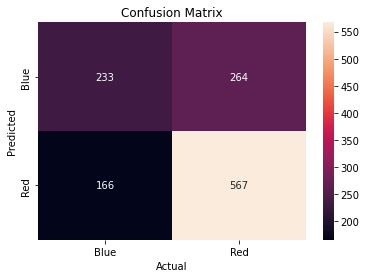

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred) 
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax, fmt = "d")

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Confusion Matrix")

ax.xaxis.set_ticklabels(['Blue', 'Red'])
ax.yaxis.set_ticklabels(['Blue', 'Red'])

In [26]:
'''feature_names = [col for col in X_train]
feature_importances = model['random_forest'].feature_importances_
indices = np.argsort(feature_importances)[::-1]
n = 30 # maximum feature importances displayed
idx = indices[0:n] 
std = np.std([tree.feature_importances_ for tree in model['random_forest'].estimators_], axis=0)

#for f in range(n):
#    print("%d. feature %s (%f)" % (f + 1, feature_names[idx[f]], feature_importances[idx[f]])) 

plt.figure(figsize=(30, 8))
plt.title("Feature importances")
plt.bar(range(n), feature_importances[idx], color="r", yerr=std[idx], align="center")
plt.xticks(range(n), [feature_names[id] for id in idx], rotation = 45) 
plt.xlim([-1, n]) 
plt.show()'''

'feature_names = [col for col in X_train]\nfeature_importances = model[\'random_forest\'].feature_importances_\nindices = np.argsort(feature_importances)[::-1]\nn = 30 # maximum feature importances displayed\nidx = indices[0:n] \nstd = np.std([tree.feature_importances_ for tree in model[\'random_forest\'].estimators_], axis=0)\n\n#for f in range(n):\n#    print("%d. feature %s (%f)" % (f + 1, feature_names[idx[f]], feature_importances[idx[f]])) \n\nplt.figure(figsize=(30, 8))\nplt.title("Feature importances")\nplt.bar(range(n), feature_importances[idx], color="r", yerr=std[idx], align="center")\nplt.xticks(range(n), [feature_names[id] for id in idx], rotation = 45) \nplt.xlim([-1, n]) \nplt.show()'

In [27]:
def predict(df, pipeline, blue_fighter, red_fighter, weightclass, rounds, title_bout=False): 
    
    #We build two dataframes, one for each figther 
    f1 = df[(df['R_fighter'] == blue_fighter) | (df['B_fighter'] == blue_fighter)].copy()
    f1.reset_index(drop=True, inplace=True)
    f1 = f1[:1]
    f2 = df[(df['R_fighter'] == red_fighter) | (df['B_fighter'] == red_fighter)].copy()
    f2.reset_index(drop=True, inplace=True)
    f2 = f2[:1]
    
    # if the fighter was red/blue corner on his last fight, we filter columns to only keep his statistics (and not the other fighter)
    # then we rename columns according to the color of  the corner in the parameters using re.sub()
    if (f1.loc[0, ['R_fighter']].values[0]) == blue_fighter:
        result1 = f1.filter(regex='^R', axis=1).copy() #here we keep the red corner stats
        result1.rename(columns = lambda x: re.sub('^R','B', x), inplace=True)  #we rename it with "B_" prefix because he's in the blue_corner
    else: 
        result1 = f1.filter(regex='^B', axis=1).copy()
    if (f2.loc[0, ['R_fighter']].values[0]) == red_fighter:
        result2 = f2.filter(regex='^R', axis=1).copy()
    else:
        result2 = f2.filter(regex='^B', axis=1).copy()
        result2.rename(columns = lambda x: re.sub('^B','R', x), inplace=True)
        
    fight = pd.concat([result1, result2], axis = 1) # we concatenate the red and blue fighter dataframes (in columns)
    fight.drop(['R_fighter','B_fighter'], axis = 1, inplace = True) # we remove fighter names
    fight.insert(0, 'title_bout', title_bout) # we add tittle_bout, weight class and number of rounds data to the dataframe
    fight.insert(1, 'weight_class', weightclass)
    fight.insert(2, 'no_of_rounds', rounds)
    fight['title_bout'] = fight['title_bout'].replace({True: 1, False: 0})
    
    pred = pipeline.predict(fight)
    proba = pipeline.predict_proba(fight)
    if (pred == 1.0): 
        print("The predicted winner is", red_fighter, 'with a probability of', round(proba[0][1] * 100, 2), "%")
    else:
        print("The predicted winner is", blue_fighter, 'with a probability of ', round(proba[0][0] * 100, 2), "%")
    return proba

In [28]:
predict(data, model, 'JIRI PROCHAZKA', 'GLOVER TEIXEIRA', 'LightHeavyweight', 5, True) 

The predicted winner is GLOVER TEIXEIRA with a probability of 52.0 %


array([[0.48, 0.52]])

In [29]:
'''# buscando colinealidad

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(data.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(data.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5},
           annot=True);'''

"# buscando colinealidad\n\nplt.figure(figsize=(15, 10))\n\nsns.set(style='white')\n\nmask=np.triu(np.ones_like(data.corr(), dtype=bool))\n\ncmap=sns.diverging_palette(0, 10, as_cmap=True)\n\n\nsns.heatmap(data.corr(),\n           mask=mask,\n          cmap=cmap,\n          center=0,\n          square=True,\n          linewidths=0.5,\n          cbar_kws={'shrink': 0.5},\n           annot=True);"

### LOGISTIC REGRESSION AND RANDOM FOREST

In [30]:
'''# label encoding 

le=LabelEncoder()

for c in data.columns:
    
    if data.dtypes[c]==object:
        
        le.fit(data[c].astype(str))
        
        data[c]=le.transform(data[c].astype(str))

X = data.drop('Winner', axis=1)

y = data.Winner

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, train_size=0.8,
                                                    random_state=42)

logreg=LogisticRegression(max_iter=2000)

# RMSE POR MODELO
models = [logreg, rfr]

for m in models:
    
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    
    print(f'RMSE Model {m}: {mse(y_test, y_pred, squared=False)}')
    print(f'R2 Model {m}: {r2(y_test, y_pred)}')
    
sum(y_pred==y_test)/y_pred.shape[0]*100'''

"# label encoding \n\nle=LabelEncoder()\n\nfor c in data.columns:\n    \n    if data.dtypes[c]==object:\n        \n        le.fit(data[c].astype(str))\n        \n        data[c]=le.transform(data[c].astype(str))\n\nX = data.drop('Winner', axis=1)\n\ny = data.Winner\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, \n                                                    test_size=0.2, train_size=0.8,\n                                                    random_state=42)\n\nlogreg=LogisticRegression(max_iter=2000)\n\n# RMSE POR MODELO\nmodels = [logreg, rfr]\n\nfor m in models:\n    \n    m.fit(X_train, y_train)\n    y_pred = m.predict(X_test)\n    \n    print(f'RMSE Model {m}: {mse(y_test, y_pred, squared=False)}')\n    print(f'R2 Model {m}: {r2(y_test, y_pred)}')\n    \nsum(y_pred==y_test)/y_pred.shape[0]*100"

### H2O

In [31]:
'''train = data.iloc[:4580]

test = data.iloc[4580:].drop('Winner', axis=1)

train.shape, test.shape'''

"train = data.iloc[:4580]\n\ntest = data.iloc[4580:].drop('Winner', axis=1)\n\ntrain.shape, test.shape"

In [32]:
'''# H2O

h2o.init()

# parsear datos para h20

h2train=h2o.H2OFrame(train)

h2test=h2o.H2OFrame(test)

X=[c for c in h2train.columns if c!='Winner']

y='Winner'

# inicia auto-machine-learning

automl=H2OAutoML(max_models=50,
                 seed=42,
                 max_runtime_secs=300,
                 sort_metric='RMSE')'''

"# H2O\n\nh2o.init()\n\n# parsear datos para h20\n\nh2train=h2o.H2OFrame(train)\n\nh2test=h2o.H2OFrame(test)\n\nX=[c for c in h2train.columns if c!='Winner']\n\ny='Winner'\n\n# inicia auto-machine-learning\n\nautoml=H2OAutoML(max_models=50,\n                 seed=42,\n                 max_runtime_secs=300,\n                 sort_metric='RMSE')"

In [33]:
'''# entrena

automl.train(x=X,
             y=y,
             training_frame=h2train)'''

'# entrena\n\nautoml.train(x=X,\n             y=y,\n             training_frame=h2train)'

In [34]:
'''# prediciones del lider

y_pred = automl.leader.predict(h2test)

y_pred = y_pred.as_data_frame()

y_pred'''

'# prediciones del lider\n\ny_pred = automl.leader.predict(h2test)\n\ny_pred = y_pred.as_data_frame()\n\ny_pred'